In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

#membaca fiie csv menggunakan pandas
df = pd.read_csv('/content/gdrive/MyDrive/1.Kuliah/Semester-7/Machine_Learning/Praktikum/Praktikum06/Data/Iris.csv')

#cetak header data (5 baris data) dari file
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

#kolom target (label)
y = df['Species']

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#laoran klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<function matplotlib.pyplot.show(close=None, block=None)>

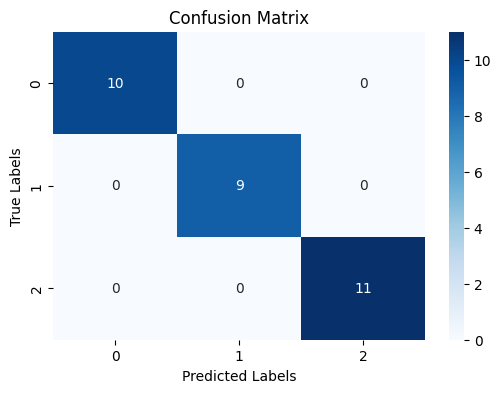

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Buat confussion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show

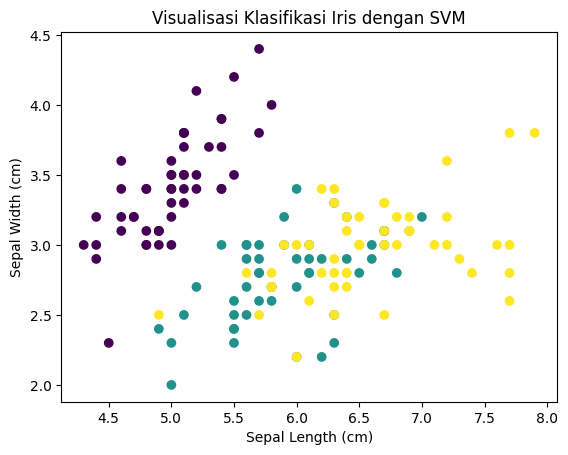

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Klasifikasi Iris dengan SVM')
plt.show()

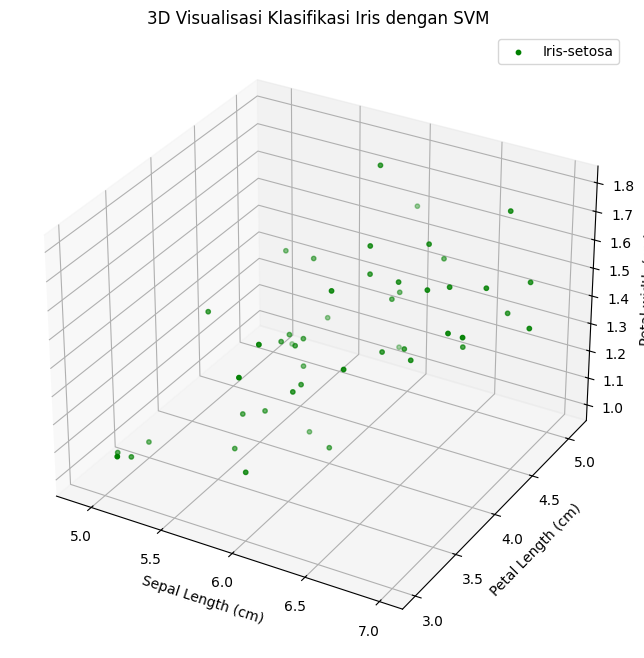

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

#3. Encode label (ubah teks jadai angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

#8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

#plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
  subset = df[df['SpeciesEncoded'] == 1]
  ax.scatter(
      subset['SepalLengthCm'],
      subset['PetalLengthCm'],
      subset['PetalWidthCm'],
      color=colors[1],
      label=species,
      s=10
  )

  ax.set_xlabel('Sepal Length (cm)')
  ax.set_ylabel('Petal Length (cm)')
  ax.set_zlabel('Petal width (cm)')
  ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
  ax.legend()
  plt.show()

Tugas Mandiri 6

In [82]:
#membaca fiie csv menggunakan pandas
df = pd.read_csv('/content/gdrive/MyDrive/1.Kuliah/Semester-7/Machine_Learning/Praktikum/Praktikum06/Data/wine_food_pairings.csv')

#cetak header data (5 baris data) dari file
df.head()

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        500 non-null    object
 1   wine_category    500 non-null    object
 2   food_item        500 non-null    object
 3   food_category    500 non-null    object
 4   cuisine          500 non-null    object
 5   pairing_quality  500 non-null    int64 
 6   quality_label    500 non-null    object
 7   description      500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


In [84]:
df.describe()

,pairing_quality
count,500.000000
mean,3.130000
std,1.007537
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [92]:
df = df.rename(columns={
    'wine_type': 'tipe_wine',
    'wine_category': 'kategori_wine',
    'food_item': 'item_makanan',
    'food_category': 'kategori_makanan',
    'cuisine': 'asal_makanan',
    'pairing_quality': 'kualitas_paduan',
    'quality_label': 'label_kualitas',
    'description': 'deskripsi'

})

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tipe_wine         500 non-null    object
 1   kategori_wine     500 non-null    object
 2   item_makanan      500 non-null    object
 3   kategori_makanan  500 non-null    object
 4   asal_makanan      500 non-null    object
 5   kualitas_paduan   500 non-null    int64 
 6   label_kualitas    500 non-null    object
 7   deskripsi         500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


In [109]:
df["kualitas_paduan"].unique()

array([2, 3, 4, 5, 1])

In [110]:
df["kualitas_paduan"].value_counts()

,count
kualitas_paduan,
3,195
4,144
2,91
5,38
1,32


In [115]:
# Kolom fitur (X)
X = df[['tipe_wine', 'kategori_wine', 'item_makanan', 'kategori_makanan', 'asal_makanan', 'label_kualitas', 'deskripsi']]

# Kolom target (label)
y = df['kualitas_paduan']

In [116]:
X.head()

,tipe_wine,kategori_wine,item_makanan,kategori_makanan,asal_makanan,label_kualitas,deskripsi
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,Poor,Heuristic pairing assessment
1,Grenache,Red,charcuterie board,Salty Snack,French,Neutral,Heuristic pairing assessment
2,Madeira,Fortified,lemon tart,Dessert,French,Good,Acidic wine balances acidic food
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,Excellent,Tannic red complements red meat fat
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,Poor,Heuristic pairing assessment


In [117]:
y.head()

,kualitas_paduan
0,2
1,3
2,4
3,5
4,2


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Membuat model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [121]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#laoran klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00         9

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100




Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0  9]]


<function matplotlib.pyplot.show(close=None, block=None)>

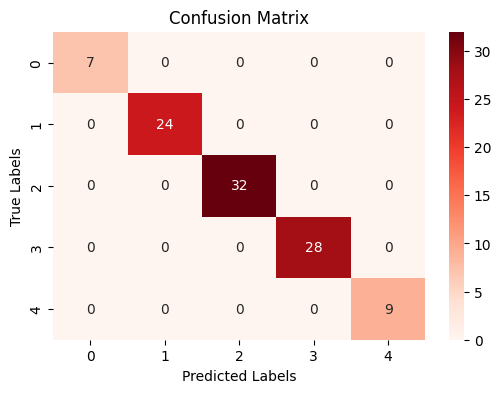

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Buat confussion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show

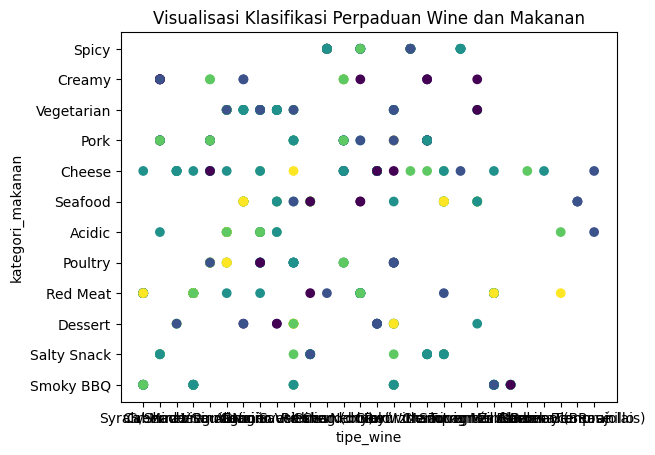

In [124]:
import matplotlib.pyplot as plt

plt.scatter(df['tipe_wine'], df['kategori_makanan'], c=df['kualitas_paduan'].astype('category').cat.codes)
plt.xlabel('tipe_wine')
plt.ylabel('kategori_makanan')
plt.title('Visualisasi Klasifikasi Perpaduan Wine dan Makanan')
plt.show()

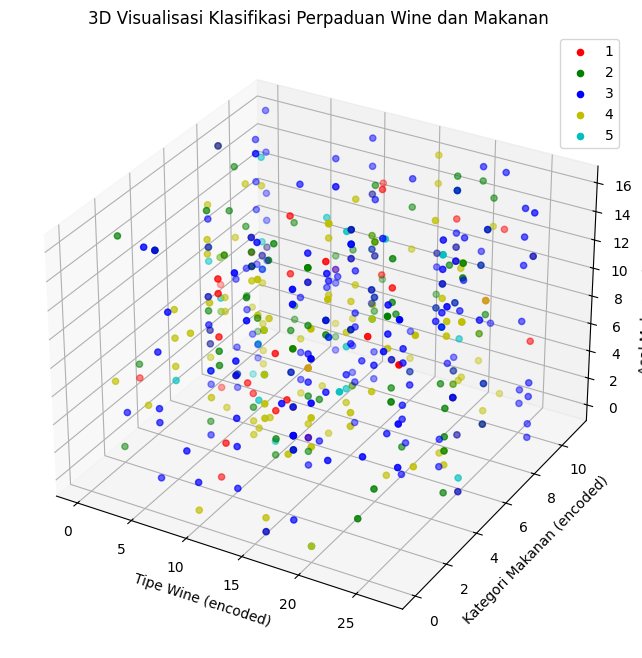

In [131]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Encode label target (kualitas paduan)
le = LabelEncoder()
df['KualitasEncoded'] = le.fit_transform(df['kualitas_paduan'])

# Encode kolom teks untuk plotting
df['tipe_wine_encoded'] = df['tipe_wine'].astype('category').cat.codes
df['kategori_makanan_encoded'] = df['kategori_makanan'].astype('category').cat.codes
df['asal_makanan_encoded'] = df['asal_makanan'].astype('category').cat.codes

# Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna otomatis berdasarkan jumlah kelas
colors = ['r', 'g', 'b', 'y', 'c', 'm']
labels = le.classes_

for i, kualitas in enumerate(labels):
    subset = df[df['KualitasEncoded'] == i]
    ax.scatter(
        subset['tipe_wine_encoded'],
        subset['kategori_makanan_encoded'],
        subset['asal_makanan_encoded'],
        color=colors[i % len(colors)],
        label=kualitas,
        s=20
    )

# Label dan judul
ax.set_xlabel('Tipe Wine (encoded)')
ax.set_ylabel('Kategori Makanan (encoded)')
ax.set_zlabel('Asal Makanan (encoded)')
ax.set_title('3D Visualisasi Klasifikasi Perpaduan Wine dan Makanan')
ax.legend()
plt.show()